In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

In [13]:
# Mengecek data
hour_data.head()
day_data.head()

# Menangani missing values atau outliers jika ada

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


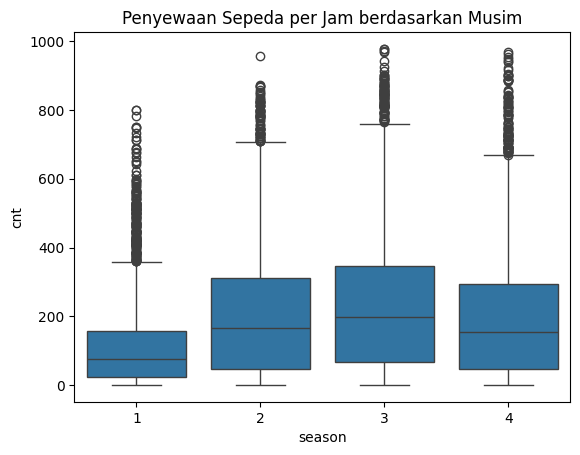

In [14]:
sns.boxplot(x='season', y='cnt', data=hour_data)
plt.title('Penyewaan Sepeda per Jam berdasarkan Musim')
plt.show()

In [15]:
#Lakukan analisis deskriptif menggunakan teknik seperti:

#Statistik dasar: mean, median, standar deviasi, dll.
#Visualisasi: Misalnya, boxplot atau histogram untuk distribusi data.

In [ ]:
#Bagaimana distribusi penyewaan sepeda per musim berdasarkan data per jam dan per hari?
#Apakah ada pola dalam penyewaan sepeda berdasarkan cuaca atau hari libur?